In [1]:
import zipfile
from os import walk
import os
import shutil
import cv2
import tensorflow as tf
import numpy as np
path_to_zip_file = 'Advanced_Topics_950636984_(S22)-Collective_MNIST_Data-8451/*.zip'
directory_to_extract_to = "Extracted/"

In [95]:
# For white Images
f = []
i = 0
origpath = f"D:\\TUM 2\\AIoT\\Project\\Collective dataset\\Extracted\\Black2\\"
copypath = f"D:\\TUM 2\\AIoT\\Project\\Collective dataset\\Extracted\\Black\\"
#copypath3 = f"D:\\TUM 2\\AIoT\\Project\\Collective dataset\\Extracted\\Black\\"
copypath2 = f"D:\\TUM 2\\AIoT\\Project\\Collective dataset\\Extracted\\White\\v4\\"
for (dirpath, dirnames, filenames) in walk(origpath):
 
    if dirpath[-2] == '\\':
        
        
        for file in filenames:
            if filenames[0] != '.':
                orig = dirpath+ '\\' + file
#                 print(orig)
#                 print(copypath+file)
#                 shutil.copyfile(orig, copypath+file)

    f.extend(filenames)
#
# Orignalpath = "Extracted/White/"
# shutil.copyfile(Orignalpath, copypath)
# os.mkdir(path)
# for filename in f:


In [96]:
train_images = []
train_labels = []
correct_file = []
tran = np.empty((1,28,28), int)
shiftX = 3
for file in f:
    #or i in range(10):
    #print(file)
    if file[-1] == 'p':# and file[-7:-4] != '667':
#         print(copypath+file)
        im = cv2.imread(copypath+file, cv2.IMREAD_GRAYSCALE)
#         print(im)
        #T, im = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
        #m = cv2.bitwise_not(im)
        
        if im is not None and im.shape == (28, 28):
            
            temp_img = np.zeros((28, 28), dtype=np.ubyte)

            temp_img[:,:28-shiftX] = im[:,shiftX:]
            newFile = copypath2+file[0] +'/'+ file[:-4] + str(shiftX) +'.jpg' 
            #print(newFile)
            cv2.imwrite(newFile, temp_img)
        else:
            print(im)

In [2]:
copypath2 = f"D:\\TUM 2\\AIoT\\Project\\Collective dataset\\Extracted\\White\\v4"
copypath2 = f"D:\\TUM 2\\AIoT\\Project\\Collective dataset\\temp3"
batch_size = 16
img_height = 28
img_width = 28
train_ds = tf.keras.utils.image_dataset_from_directory(
  copypath2,
  validation_split=0.3,
  subset="training",
  color_mode = 'grayscale',
  #crop_to_aspect_ratio=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
valid_ds = tf.keras.utils.image_dataset_from_directory(
  copypath2,
  validation_split=0.3,
  subset="validation",
  color_mode = 'grayscale',
  #crop_to_aspect_ratio=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# normalization_layer = tf.keras.layers.Rescaling(1./255)
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))


Found 35549 files belonging to 10 classes.
Using 24885 files for training.
Found 35549 files belonging to 10 classes.
Using 10664 files for validation.


In [105]:
# def shifting(x):
#      print(x)
#      return tf.keras.preprocessing.image.random_shift(
#         x,
#         0.1,
#         0.1,
#         row_axis=1,
#         col_axis=2,
#         channel_axis=3,
#         fill_mode='constant',
#         cval=0.0,
#         interpolation_order=1
#     )
# train_ds2 = train_ds.map(lambda x, y: (shifting(x), y))
# valid_ds2= valid_ds.map(lambda x, y: (shifting(x), y))
data_augmentation = tf.keras.Sequential([
  layers.RandomTranslation(height_factor=0.12,
    width_factor=0.12,
    fill_mode='constant',
    interpolation='nearest',
    seed=None,
    fill_value=0.0,),
  layers.RandomRotation(0.05),
  layers.RandomZoom(0.05),
])

In [3]:
model = tf.keras.models.Sequential([
 #data_augmentation,
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(128, activation='leaky_relu'), #128 best
  tf.keras.layers.Dense(64, activation='leaky_relu'),
  tf.keras.layers.Dense(64, activation='leaky_relu'),
  #tf.keras.layers.Dropout(0.2), # Experimental
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history1 = model.fit(
    train_ds,
    epochs=2,
    #validation_data=valid_ds.map(lambda x, y: (normalization_layer(x), y)),
    validation_data=valid_ds,
)


Epoch 1/2
1556/1556 [==============================] - 52s 33ms/step - loss: 2.6857 - sparse_categorical_accuracy: 0.4604 - val_loss: 1.3849 - val_sparse_categorical_accuracy: 0.5753
Epoch 2/2
1556/1556 [==============================] - 9s 6ms/step - loss: 1.1322 - sparse_categorical_accuracy: 0.6578 - val_loss: 1.0910 - val_sparse_categorical_accuracy: 0.6848


In [15]:

from tensorflow.keras import layers
model2 = tf.keras.Sequential()


model2.add(layers.Conv2D(10, (3, 3), activation='leaky_relu', input_shape=(28, 28,1), strides=(2,2)))#, activity_regularizer=Regularizer, kernel_regularizer=Regularizer))
#model.add(tf.keras.layers.BatchNormalization())
model2.add(layers.Flatten())
#model.add(tf.keras.layers.Dropout(0.1))
model2.add(layers.Dense(10))

#Using ADAM optimizer
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


history2 = model2.fit(
    train_ds,
    epochs=40,
    validation_data=valid_ds,
    shuffle=True,
   # callbacks=[callback],
    verbose=2

)


Epoch 1/40
1556/1556 - 11s - loss: 3.2229 - accuracy: 0.4958 - val_loss: 1.1662 - val_accuracy: 0.6540 - 11s/epoch - 7ms/step
Epoch 2/40
1556/1556 - 9s - loss: 0.9208 - accuracy: 0.7186 - val_loss: 0.8687 - val_accuracy: 0.7426 - 9s/epoch - 6ms/step
Epoch 3/40
1556/1556 - 10s - loss: 0.7634 - accuracy: 0.7646 - val_loss: 1.2974 - val_accuracy: 0.6608 - 10s/epoch - 6ms/step
Epoch 4/40
1556/1556 - 9s - loss: 0.6883 - accuracy: 0.7877 - val_loss: 0.7825 - val_accuracy: 0.7779 - 9s/epoch - 6ms/step
Epoch 5/40
1556/1556 - 11s - loss: 0.6625 - accuracy: 0.7950 - val_loss: 0.7649 - val_accuracy: 0.7858 - 11s/epoch - 7ms/step
Epoch 6/40
1556/1556 - 10s - loss: 0.5983 - accuracy: 0.8154 - val_loss: 0.9794 - val_accuracy: 0.7502 - 10s/epoch - 6ms/step
Epoch 7/40
1556/1556 - 9s - loss: 0.5795 - accuracy: 0.8214 - val_loss: 0.7915 - val_accuracy: 0.7958 - 9s/epoch - 6ms/step
Epoch 8/40
1556/1556 - 8s - loss: 0.5583 - accuracy: 0.8299 - val_loss: 0.9178 - val_accuracy: 0.7798 - 8s/epoch - 5ms/step


In [8]:
from tensorflow.keras.layers import *
model3 = tf.keras.Sequential()
#convolutional layer with rectified linear unit activation
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28,1)))
# model3.add(layers.RandomRotation(0.2))
# model3.add(layers.RandomZoom(0.2)) # New

#again
#64 convolution filters used each of size 3x3
model3.add(Conv2D(64, (3, 3), activation='leaky_relu')) # relu


#Max pooling to reduce filter dimensions and getting best features
model3.add(MaxPooling2D(pool_size=(2, 2)))

#32 convolution filters used each of size 3x3
model3.add(Conv2D(32, (2, 2), activation='leaky_relu')) # relu

#Max pooling to reduce filter dimensions
model3.add(MaxPooling2D(pool_size=(2, 2)))

#Dropout for reducing overfit and 
model3.add(Dropout(0.2))

#Flat for fully connected layers
model3.add(Flatten())

#fully connected to get all relevant data
model3.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model3.add(Dropout(0.2))
#output a softmax to squash the matrix into output probabilities
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


history = model3.fit(
    train_ds,
    epochs=35,
    validation_data=valid_ds,
    shuffle=True,
    verbose=2)

Epoch 1/35
1556/1556 - 39s - loss: 0.7694 - accuracy: 0.7755 - val_loss: 0.1551 - val_accuracy: 0.9530 - 39s/epoch - 25ms/step
Epoch 2/35
1556/1556 - 42s - loss: 0.2139 - accuracy: 0.9339 - val_loss: 0.1072 - val_accuracy: 0.9681 - 42s/epoch - 27ms/step
Epoch 3/35
1556/1556 - 42s - loss: 0.1661 - accuracy: 0.9485 - val_loss: 0.0897 - val_accuracy: 0.9719 - 42s/epoch - 27ms/step
Epoch 4/35
1556/1556 - 42s - loss: 0.1330 - accuracy: 0.9603 - val_loss: 0.0613 - val_accuracy: 0.9814 - 42s/epoch - 27ms/step
Epoch 5/35
1556/1556 - 43s - loss: 0.1165 - accuracy: 0.9657 - val_loss: 0.0888 - val_accuracy: 0.9746 - 43s/epoch - 28ms/step
Epoch 6/35
1556/1556 - 44s - loss: 0.1008 - accuracy: 0.9704 - val_loss: 0.0632 - val_accuracy: 0.9817 - 44s/epoch - 28ms/step
Epoch 7/35
1556/1556 - 42s - loss: 0.1027 - accuracy: 0.9706 - val_loss: 0.0859 - val_accuracy: 0.9768 - 42s/epoch - 27ms/step
Epoch 8/35
1556/1556 - 42s - loss: 0.0848 - accuracy: 0.9743 - val_loss: 0.0670 - val_accuracy: 0.9826 - 42s/ep

In [12]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
results = model.evaluate(x_test, y_test, batch_size=32)
print("test loss, test acc:", results)
y_pred = model.predict(x_test)


#tf.math.confusion_matrix(y_pred, y_test)
print(y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.8854 - sparse_categorical_accuracy: 0.7684
test loss, test acc: [3.885396957397461, 0.7684000134468079]
[7 2 1 ... 4 5 6]


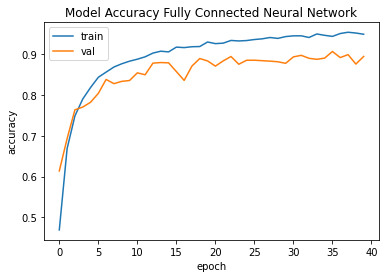

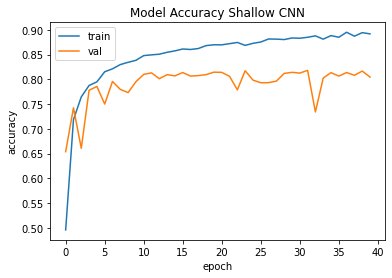

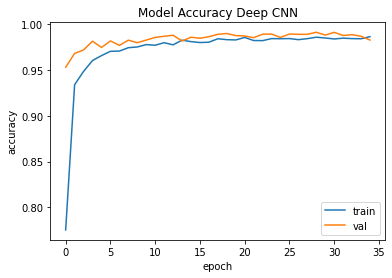

In [34]:
import matplotlib.pyplot as plt
history3 = history1

plt.plot(history1.history['sparse_categorical_accuracy'])
plt.plot(history1.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy Fully Connected Neural Network')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])# loc='bottom rightt')
plt.savefig("NN curve.png",)
plt.show()

#print(history2.history)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy Shallow CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])# loc='bottom rightt')
plt.savefig("Shallow CNN curve.png",)
plt.show()
#print(history2.history)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Deep CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])# loc='bottom rightt')
plt.savefig("Deep CNN curve.png",)
plt.show()

In [313]:
def ReLU(x):
    return x * (x > 0)
xx = model.layers[0].get_weights()
w1,b1 = model.layers[1].get_weights()

w2,b2 = model.layers[2].get_weights()

w1 = np.int8(w1*1000)
b1 = np.int8(b1*1000)
w2 = np.int8(w2*1000)
b2 = np.int8(b2*1000)
print(b2.shape)
x = np.dot(img3, w1) + b1
print("x:")
print(x)
x = img3.dot(w1) + b1
print(x)
#x = np.int16(ReLU(x))
x2 = np.dot(x, w2) + b2
print(x2/(1))
print(xx)
print(list(b1))
print(b2)
print(img3[0:20])

(10,)
x:
[ -6830 -18265  10813 -22132 -20812  25534  24942  23880   3641  11888]
[ -6830 -18265  10813 -22132 -20812  25534  24942  23880   3641  11888]
[-14911. -32515.  30593. -10531.  15075. -12878. -21869. -30789. -25043.
 -25540.]
[]
[-24, -35, -42, -51, -42, -39, -31, -47, -45, -33]
[ -3  -8   9  52 -41  14   8  19 -11 -15]
[0 0 0 0 0 0 0 0 0 2 1 0 4 1 0 0 2 0 3 1]


In [252]:
print(len(Weights))
print(w1.shape)
w1 = np.asarray(Weights)[:-1280] 
b1 = np.array(Biases)[0:128] 
w1 = w1.reshape(128,784) 
w2 = np.array(Weights)[-1280:] / 100
w2 = w2.reshape(128, 10)
b2 = np.array(Biases)[128:] / 100
img3= img2.reshape(784,)
img2
print(b1.shape)

101632
(128, 784)
(128,)


In [253]:
def feedForward(A):
    a1 = (w1.dot(A1))+b1
    print(A.shape)
    print(w1.shape)
    print(a1.shape)
    print(w2.shape)
    a2 = np.dot(a1,w2) + b2
    return a2
out = feedForward(img3)

(784,)
(128, 784)
(128,)
(128, 10)


In [1]:
print(out)
print(tf.nn.softmax(out))

NameError: name 'out' is not defined

In [225]:
with open('weights_20.txt', 'w') as f:
        f.write(str(w))

In [4]:
file = "weights/"
filelist=['w1', 'w2', 'w3', 'b']

In [229]:
np.savetxt('w1.txt', np.int8(w*1000), fmt='%4d')

In [22]:
folder = "weights//"
filelist=['w1', 'w2', 'w3','w4', 'b']

w1,b1 = model.layers[1].get_weights()

w2,b2 = model.layers[2].get_weights()

w3, b3 = model.layers[3].get_weights()

w4, b4 = model.layers[4].get_weights()

weight_list = [w1, w2, w3, w4]
bias_list = [b1, b2, b3, b4]
layers = 4
for i in range(layers+1):
    
    filename = folder+ filelist[i]+'.h'
    print(filename)
    if(i!=layers):
        data = weight_list[i]
        with open(filename, 'w') as outfile:   
            outfile.write('{')
            for data_slice in data:
                #print(data_slice)
                outfile.write('')
                outfile.write(str(list(np.int16(data_slice*1000))))
                outfile.write(',\n')
            outfile.write('}')
            
    else:
        open(filename, 'w').write('')
        for j in range(layers):
            with open(filename, 'a') as outfile: 
                outfile.write('\n\n'+ str(j) + '{')
                data = bias_list[j]
                print(data)
                outfile.write('')
                outfile.write(str(list(np.int16(data*1000))))
                outfile.write(',\n')
                outfile.write('}')

weights//w1.h
weights//w2.h
weights//w3.h
weights//w4.h
weights//b.h
[ 0.34477022 -0.77843684  0.49715942 -0.4881589   0.09311    -0.6552187
 -0.85140395 -0.25082785 -0.892811   -0.35822847 -0.7317674  -0.50530994
  0.4418515   0.14784949 -0.1414101  -0.3936809   0.05317793 -0.42811736
 -0.6739678  -0.11004055 -0.8573937  -0.6949404  -0.33670178 -0.2714683
 -0.3408737  -0.20490392 -0.52889496 -0.32403204  0.41841325  0.43555808
 -0.42716378 -0.4556817   0.08847018 -0.3085072  -0.44659662 -0.6017748
 -0.4126264  -0.3481864  -0.5527288  -0.29595733 -0.4312147   0.5494553
  0.41920352  0.03563305  1.0252807  -0.64711726 -0.47566837  0.5262944
  0.5620533  -0.07386962  0.18778373  0.7689559   0.32489657 -0.4302776
  0.08654407  0.2592252  -0.39277375 -1.2782222  -0.8175399  -0.1238507
 -0.51294285  0.41627637 -0.65074307 -0.47670996  0.44605288 -0.23854417
  0.5061089   0.20084332  0.16605875 -0.11769135 -0.82543063 -0.63982135
 -0.5038092  -0.37011272 -0.29197147 -0.5622201  -0.17616838 -

In [21]:
print(w3.shape)
print(w2.shape)

(128, 64)
(128, 64)


In [430]:
data = b2
with open('b_test4.txt', 'w') as outfile:

    outfile.write('{')
      
    outfile.write('')
    #np.savetxt(outfile, data_slice, fmt='%-4d')
    outfile.write(str(list(np.int16(1000*data))))
    # Writing out a break to indicate different slices...
    outfile.write(',\n')
    outfile.write('}')

In [23]:
img3 = [ 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
1, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1,
1, 0, 0, 0, 1, 1, 0, 4, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1,
0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1,
0, 1, 2, 0, 0, 3, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 3, 2, 0, 0, 2, 2, 0, 3, 0, 1, 2, 1,
0, 0, 0, 4, 0, 0, 2, 1, 5, 23, 69, 59, 53, 60, 68, 60, 1, 1, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0,
0, 0, 1, 0, 0, 6, 0, 1, 55, 41, 6, 0, 0, 0, 3, 5, 69, 61, 42, 0, 4, 0, 1, 2, 0, 0, 1, 1,
3, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 9, 30, 61, 1, 0, 0, 2, 0, 0, 0, 1,
0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 2, 29, 61, 0, 2, 0, 2, 1, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 54, 31, 0, 1, 0, 0, 0, 1,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 77, 0, 0, 2, 1, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 73, 5, 1, 0, 1, 2, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 57, 6, 4, 0, 1, 2, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 72, 0, 0, 2, 1, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 15, 61, 0, 0, 0, 0, 0, 2,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 73, 1, 0, 0, 3, 2, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 3, 6, 48, 21, 0, 0, 1, 1, 1, 0, 1,
0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 11, 18, 32, 38, 1, 0, 0, 1, 0, 0, 0, 1,
0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 6, 27, 35, 56, 2, 0, 0, 0, 1, 0, 0, 1, 0,
0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 4, 0, 0, 44, 51, 36, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0,
2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 4, 0, 13, 60, 25, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2,
0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 54, 55, 1, 4, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0,
3, 2, 0, 0, 0, 4, 0, 0, 3, 13, 37, 59, 12, 3, 0, 0, 1, 1, 0, 0, 3, 3, 0, 0, 4, 3, 2, 0,
0, 0, 1, 5, 1, 0, 0, 20, 56, 49, 32, 3, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4,
3, 2, 0, 0, 0, 22, 61, 41, 0, 0, 1, 0, 0, 2, 0, 1, 17, 21, 32, 56, 54, 50, 59, 62, 61, 62, 63, 77,
0, 0, 1, 2, 0, 106, 56, 25, 57, 55, 51, 47, 52, 51, 61, 55, 36, 29, 13, 0, 3, 0, 0, 0, 1, 1, 0, 2,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
img3 = np.array(img3)
img3.shape

(784,)

In [422]:
def learkyRelu(val):
    if val>0:
        return val
    else:
        return 0.3*val
def ReLU(x):
    return x * (x > 0)
xx = model.layers[0].get_weights()

w1,b1 = model.layers[1].get_weights()
w2,b2 = model.layers[2].get_weights()
w3, b3 = model.layers[3].get_weights()
w4, b4 = model.layers[4].get_weights()
# w1 = np.int8(w1*1000)
# b1 = np.int8(b1*1000)
#w1 = w1.reshape(10, 784)
x = np.dot(img3, (w1)) + (b1)
print("x:")


x = (learkyRelu(x))
x2 = np.dot(x, (w2)) + (b2)
x2 = (learkyRelu(x2))
x3 = np.dot(x2, (w3)) + (b3)
x3 = (learkyRelu(x3))

x4 = 


print(x2)
#print(b2)
print(x)

x:
[ 11122.235     4544.6396     341.20895  -3134.2932  -20861.146
 -27310.154     9519.088     7638.7803    2887.356   -21620.715  ]
[    0     0 14218 23316     0 31921     0     0     0     0     0 21637
  2709 22961 14144     0 18476 14631     0     0     0     0     0     0
 28365 24066  8766     0 23227     0     0     0     0 12664     0 10822
     0     0  4899     0     0     0  6117     0 13771     0  8606  6402
     0 16347 12504     0 22522     0     0 17147     0     0 23601 18314
     0     0     0     0 19535     0  8408 23575     0 28085     0     0
     0 30931 27754  3144   190  2408 11428     0 14927 15192     0 31793
     0  6548     0     0  8048 22557     0     0 17313  1309     0     0
     0     0   745 24586     0     0 32335     0     0     0     0 10318
     0 27625 18779     0 30694     0 19180 15771     0     0 26046     0
     0 20087 32657     0     0     0  9603     0]


In [423]:
# #w1 = w1.reshape(10,784)
# w1,b1 = model.layers[1].get_weights()
# w1 = np.int8(w1*1000)
# b1 = np.int8(b1*1000)
# x4 = np.zeros((128))
# for i in range(128):
#     x4[i] = b1[i]
#     for j in range(784):
#         x4[i] += w1[j][i]*img3[j]
# #         if i==0:
# #             print(str(j) + " x4: " +str(x4[i]) + " w1: " + str(w1[j][i]) + " img:" + str(img3[j]))
    
# print(x4)

temp_input = x/1000#*1000
#w1 = w1.reshape(10,784)
w1,b1 = model.layers[2].get_weights()
# w1 = np.int8(w1*1000)
# b1 = np.int8(b1*1000)
x4 = np.zeros((10))
for i in range(10):
    x4[i] = b1[i]
    for j in range(128):
        x4[i] += w1[j][i]*temp_input[j]
        if i==0:
            print(str(j) + " x4: " +str(x4[i]) + " w1: " + str(w1[j][i]) + " img:" + str(temp_input[j]))
    
print(x4)
print(np.max(x4))

0 x4: 0.02259368821978569 w1: 0.0282203 img:0.0
1 x4: 0.02259368821978569 w1: -0.1597188 img:0.0
2 x4: 0.8603438273072243 w1: 0.0589218 img:14.218
3 x4: 5.927385520458221 w1: 0.21732037 img:23.316
4 x4: 5.927385520458221 w1: 0.09875136 img:0.0
5 x4: 2.2464442552626127 w1: -0.115314096 img:31.921
6 x4: 2.2464442552626127 w1: -0.12370607 img:0.0
7 x4: 2.2464442552626127 w1: 0.041222643 img:0.0
8 x4: 2.2464442552626127 w1: 0.16489077 img:0.0
9 x4: 2.2464442552626127 w1: -0.048496563 img:0.0
10 x4: 2.2464442552626127 w1: 0.04184582 img:0.0
11 x4: 3.421308991800993 w1: 0.054298874 img:21.637
12 x4: 3.7140829769037658 w1: 0.10807456 img:2.709
13 x4: 1.9555923298560078 w1: -0.07658598 img:22.961
14 x4: 3.4810529779158528 w1: 0.10785214 img:14.144
15 x4: 3.4810529779158528 w1: -0.16763853 img:0.0
16 x4: 4.975547019209712 w1: 0.0808884 img:18.476
17 x4: 3.542408134277909 w1: -0.09795222 img:14.631
18 x4: 3.542408134277909 w1: -0.15134692 img:0.0
19 x4: 3.542408134277909 w1: -0.07742994 img:0.0


In [398]:
def ReLU(x):
    return x * (x > 0)
xx = model.layers[0].get_weights()

w1,b1 = model.layers[1].get_weights()
w2,b2 = model.layers[2].get_weights()
w1 = np.int8(w1*1000)
b1 = np.int8(b1*1000)
x = np.dot(img3, (w1)) + (b1)
print("x:")
print(x)

x = (ReLU(x/1000))
x2 = np.dot(x, np.int8(w2*1000)) + np.int8(b2*1000)
print(x2)

x:
[ -2600 -11927  14218  23316   -442  31921  -4242 -19757 -14600    -86
 -31055  21637   2709  22961  14144  -9661  18476  14631 -30906 -11551
  -9352 -24252  -5920 -17883  28365  24066   8766 -17766  23227 -10788
 -31468  -6491  -9788  12664 -31426  10822 -28405  -9972   4899 -18353
  -2854 -25314   6117 -25555  13771 -23697   8606   6402 -15207  16347
  12504 -28139  22522 -16671  -7121  17147  -8151 -12229  23601  18314
  -7330 -21091  -7221 -21800  19535 -23669   8408  23575 -27211  28085
 -14990 -13666  -5952  30931  27754   3144    190   2408  11428 -25238
  14927  15192 -22078  31793  -3032   6548  -7555 -12391   8048  22557
 -21761 -19100  17313   1309 -27645 -25481   -676  -7174    745  24586
 -15228 -17708  32335 -25594 -11415 -14396 -14686  10318 -11071  27625
  18779 -30426  30694  -6729  19180  15771 -17943  -8921  26046  -1073
 -16899  20087  32657  -4482 -32414 -32335   9603 -15868]
[-2114.825 -7710.35  -6975.683 24419.814  1743.5    -569.874  2563.468
 -2199.086 -5510

[[[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 2.]
  [ 1.]
  [ 0.]
  [ 4.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 2.]
  [ 0.]
  [ 3.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 2.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 2.]
  [ 1.]
  [ 3.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 2.]
  [ 3.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 2.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 3.]
  [ 0.]
  [ 0.]
  [ 0.]


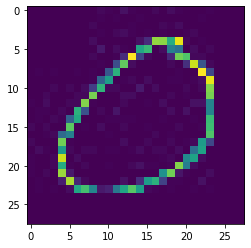

In [56]:
sunflower_path = f"D:\\TUM 2\\AIoT\\Project\\Collective dataset\\Extracted\\White\\New3\\0\\0_1_03751313.jpg"
img = tf.keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width), color_mode='grayscale'
)
img2 = np.array(img)
# print(img)
# print(img2.shape)
img_array = tf.keras.preprocessing.image.img_to_array(img2)
print(img_array)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(score)
import matplotlib.pyplot as plt
plt.imshow(img)

tf.Tensor(
[1.00000000e+00 9.72044818e-21 1.83158163e-13 3.78555054e-09
 1.66623208e-11 1.20579375e-14 7.03654621e-17 1.40371395e-10
 8.82365603e-16 1.63433313e-13], shape=(10,), dtype=float32)
[[36.56263    -9.517427    7.2342024  17.170555   11.744759    4.513575
  -0.63020015 13.875901    1.8987056   7.120258  ]]


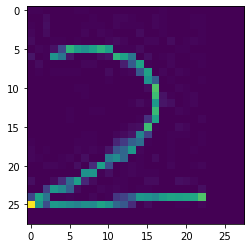

In [9]:

newC4 = newC3.reshape(28,28)

shiftX = 5
out_img2 = np.zeros((28, 28), dtype=np.ubyte)

out_img2[:,:28-shiftX] = newC4[:,shiftX:]
plt.imshow(out_img2)
img_array = tf.keras.preprocessing.image.img_to_array(newC4)
img_array = tf.expand_dims(img_array, 0)
# print(img_array.shape)
# print(img_array)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(score)
print(predictions)

In [80]:
import numpy as np
newC3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 219, 227, 232, 227, 208, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 206, 232, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 223, 255, 255, 255, 255, 255, 255, 255, 205, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 252, 255, 255, 255, 215, 216, 255, 255, 245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 205, 255, 255, 255, 207, 0, 206, 220, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 209, 255, 255, 254, 0, 0, 0, 215, 255, 255, 212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 209, 255, 255, 223, 0, 0, 0, 211, 255, 255, 213, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 221, 0, 0, 0, 207, 255, 255, 231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 229, 0, 0, 0, 207, 255, 255, 245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 251, 255, 255, 0, 0, 0, 209, 255, 255, 229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 230, 255, 255, 205, 0, 0, 213, 255, 255, 213, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 209, 255, 255, 213, 0, 208, 227, 255, 255, 207, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 241, 255, 255, 225, 231, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230, 250, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]





newC3 = np.array(newC3)

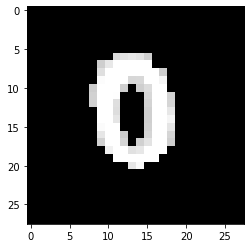

In [81]:
import matplotlib.pyplot as plt
newC5 = newC3.reshape(28,28)
plt.imshow(newC5, cmap='gray')

In [72]:
for i in range(784):
    if newC3[i]<180:
        newC3[i]=0
    else:
        newC3[i]=255

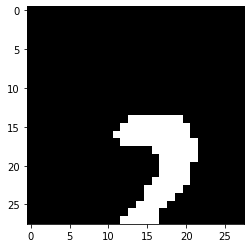

In [73]:
import matplotlib.pyplot as plt
newC5 = newC3.reshape(28,28)
plt.imshow(newC5, cmap='gray')

In [24]:

w1,b1 = model.layers[1].get_weights()
print(w1.shape)

(784, 128)


In [32]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [35]:
from tinymlgen import port
c_code = port(model, pretty_print=True)
print(c_code)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert



#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {
	0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00, 
	0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 
	0x00, 0x00, 0x04, 0x00, 0x12, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 
	0x48, 0x00, 0x00, 0x00, 0x18, 0x90, 0x01, 0x00, 0x28, 0x90, 0x01, 0x00, 
	0x78, 0x95, 0x01, 0x00, 0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 
	0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 
	0x08, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 
	0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 
	0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e,

In [36]:
open('tinyMLNN.h', 'w').write(c_code)

641267